# House Price Prediction Project by Akshay Ghodke

# Read Dataset

In [1]:
import pandas as pd
train = pd.read_csv("D:Data_Sets/Projects/ML_Housing_Project/training_set.csv")
test = pd.read_csv("D:Data_Sets/Projects/ML_Housing_Project/testing_set.csv")

from warnings import filterwarnings 
filterwarnings('ignore')

pd.set_option("display.max_columns",100)
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Check dataset info

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Check Unique values in dataset

In [3]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Drop unnecessary columns (Columns with no statitical importance)

In [4]:
train = train.drop(labels=['Id'],axis=1) #Because All Unique

# Missing Data treatment

In [5]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
#Missing Data treatment for Categorical Columns which have 'NA' as category

train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

In [8]:
#Missing Data treatment for All

for i in train.columns:
    if (train[i].dtype!='object'):
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
            x = train[i].mode()[0]
            train[i] = train[i].fillna(x)
        
for i in test.columns:
    if (test[i].dtype!='object'):
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
            x = test[i].mode()[0]
            test[i] = test[i].fillna(x)

In [9]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [10]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Check outliers

### Cat and Con Columns

In [11]:
con = []
for i in train.columns:
    if(train[i].dtypes != "object"):
        con.append(i)

In [12]:
con = train[con]

In [13]:
con.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q = pd.DataFrame(ss.fit_transform(con),columns=con.columns)

In [15]:
Q.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154


In [16]:
outliers = []
for i in Q.columns:
    out = Q[(Q[i]<-3)|(Q[i]>3)].index
    outliers.extend(out)

In [17]:
outliers

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [18]:
from numpy import unique
outliers = unique(outliers)
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   93,  102,  104,  105,
        113,  115,  116,  118,  120,  125,  129,  137,  144,  153,  154,
        159,  161,  165,  166,  169,  170,  171,  176,  178,  182,  185,
        187,  188,  189,  191,  196,  197,  198,  201,  205,  213,  215,
        218,  224,  231,  233,  237,  241,  245,  246,  249,  250,  251,
        253,  258,  260,  263,  267,  271,  273,  277,  278,  280,  289,
        291,  293,  297,  298,  299,  300,  304,  306,  309,  312,  313,
        314,  322,  325,  326,  328,  330,  332,  335,  339,  342,  343,
        346,  349,  351,  352,  355,  357,  358,  359,  360,  365,  366,
        367,  375,  378,  380,  384,  389,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  440,  441,  446,  451,  454,  457,  459,
        461,  462,  470,  471,  473,  475,  477,  4

# Droping outliers

In [19]:
train = train.drop(index=outliers,axis=0)

In [20]:
train.shape

(1015, 80)

### Re-Indexing

In [21]:
train.shape[0]

1015

In [22]:
#train.index = range(0,train.shape[0],1)

In [23]:
train = train.reset_index(drop=True)

# Exploratory Data Analysis

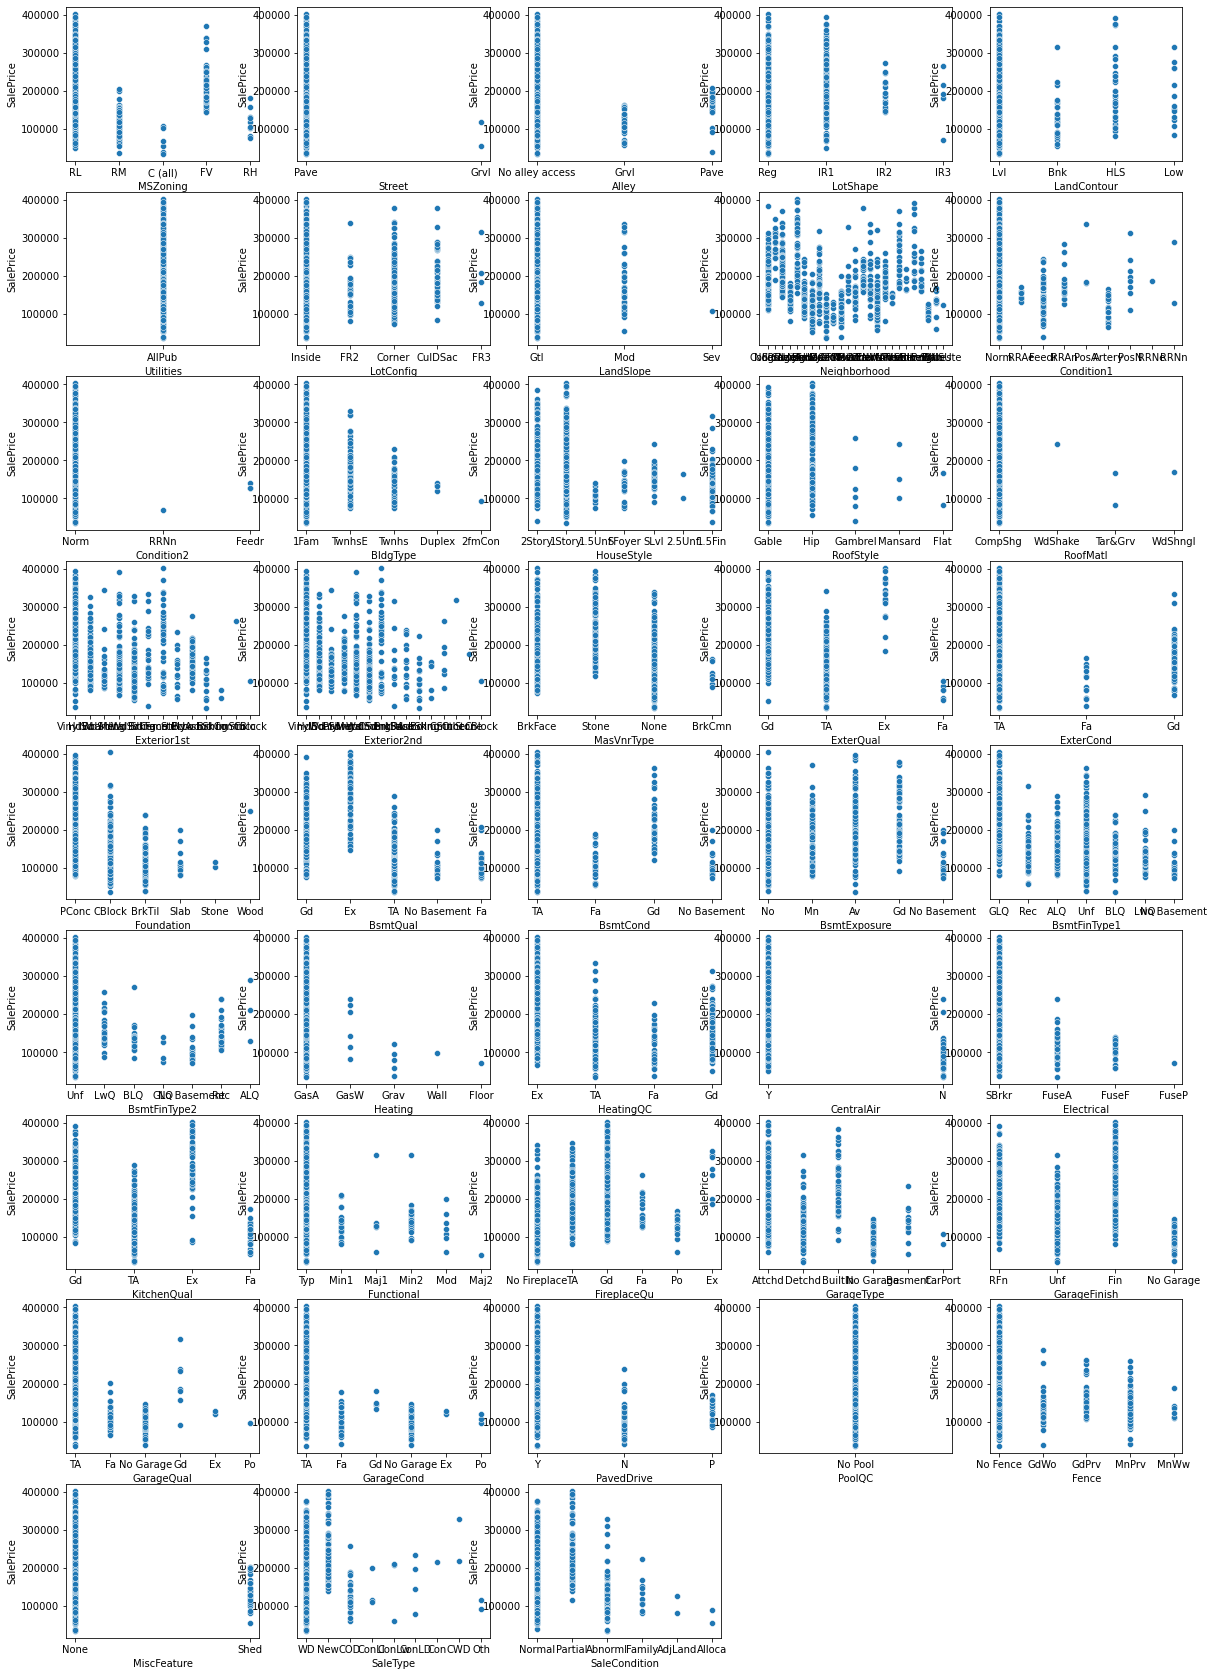

In [24]:
#EDA for Categorical Columns in train

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))
x=1

for i in train.columns:
    if (train[i].dtypes == "object"):
        plt.subplot(9,5,x)
        sb.scatterplot(train[i],train["SalePrice"])
        x=x+1

# Correlation

In [25]:
train.corr()["SalePrice"].sort_values()

EnclosedPorch   -0.205026
OverallCond     -0.158932
BsmtFinSF2      -0.098253
MiscVal         -0.070746
MSSubClass      -0.037097
YrSold          -0.026457
LowQualFinSF    -0.020850
3SsnPorch       -0.001348
ScreenPorch      0.017633
MoSold           0.088510
BsmtUnfSF        0.219351
BsmtFullBath     0.231293
HalfBath         0.268377
BedroomAbvGr     0.276780
2ndFlrSF         0.318098
WoodDeckSF       0.330729
BsmtFinSF1       0.350999
LotArea          0.364850
LotFrontage      0.386450
OpenPorchSF      0.391954
MasVnrArea       0.418379
Fireplaces       0.436872
GarageYrBlt      0.556694
YearRemodAdd     0.566916
1stFlrSF         0.593348
TotRmsAbvGrd     0.594391
TotalBsmtSF      0.627239
YearBuilt        0.632075
FullBath         0.669794
GarageArea       0.670352
GarageCars       0.697028
GrLivArea        0.757007
OverallQual      0.813903
SalePrice        1.000000
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePrice, dtype: float64

# Define X & Y

In [26]:
X = train.drop(labels=['SalePrice'],axis=1)
Y = train[['SalePrice']]

# Preprocessing

### Cat and Con varibles seperation

In [27]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

In [28]:
#con

In [29]:
Q = train.nunique()
cat1 = list(Q[Q<30].index)

In [30]:
#cat1

In [31]:
cat.extend(cat1)

In [32]:
#cat

In [33]:
from numpy import unique
con = unique(con)
con

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype='<U13')

In [34]:
cat = unique(cat)
cat

array(['3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtQual', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'HalfBath', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd',
       'Utilities', 'YrSold'], dtype='<U13')

In [35]:
con_cols = X[con] #Problem Solved..
cat_cols = X[cat]

In [36]:
con_cols.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,8,856,0,2003,2003,2008
1,920,866,0,3,486,0,1,0,434,0,1,2,608,2,2001.0,1786,1,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,6,920,0,2001,2002,2008
2,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2000.0,2198,1,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,9,1145,192,2000,2000,2008


In [37]:
cat_cols.head(3)

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,TotRmsAbvGrd,Utilities,YrSold
0,0,No alley access,3,1Fam,TA,No,GLQ,Unf,1,0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,No Fireplace,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,Inside,Reg,0,60,RL,BrkFace,None,0,2,CollgCr,5,7,Y,0,No Pool,CompShg,Gable,Normal,WD,Pave,8,AllPub,2008
1,0,No alley access,3,1Fam,TA,Mn,GLQ,Unf,1,0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,Inside,IR1,0,60,RL,BrkFace,None,0,9,CollgCr,5,7,Y,0,No Pool,CompShg,Gable,Normal,WD,Pave,6,AllPub,2008
2,0,No alley access,4,1Fam,TA,Av,GLQ,Unf,1,0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,No Fence,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,FR2,IR1,0,60,RL,BrkFace,None,0,12,NoRidge,5,8,Y,0,No Pool,CompShg,Gable,Normal,WD,Pave,9,AllPub,2008


# Standardization of Contiinous columns

In [38]:
X_con = pd.DataFrame(ss.fit_transform(con_cols),columns=con_cols.columns)
X_con.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.739360,1.304998,-0.031404,0.306264,0.725051,-0.246977,1.20979,0.0,-1.019913,-0.345325,-0.922112,0.866047,0.423406,0.352882,0.931328,0.669174,1.292692,0.0,-0.189854,-0.135913,-0.062111,0.150409,0.871532,-0.145801,-1.586507,0.355446,-0.529518,0.705529,0.0,-0.207884,1.261037,-0.436066,-0.819126,0.960424,0.818268,0.138684
1,-0.545149,1.334481,-0.031404,0.306264,0.179922,-0.246977,1.20979,0.0,-0.349135,-0.345325,0.767317,0.866047,0.727773,0.352882,0.848026,0.846250,1.292692,0.0,0.580944,0.028202,-0.062111,0.150409,0.609703,-0.145801,1.025201,-0.000831,-0.529518,0.705529,0.0,-0.207884,-0.175498,-0.259298,-0.819126,0.891548,0.770023,0.138684
2,0.137625,1.793936,-0.031404,1.738792,0.598680,-0.246977,1.20979,0.0,-0.216869,-0.345325,0.767317,0.866047,1.884369,1.763020,0.806375,1.806194,1.292692,0.0,1.409551,0.903479,-0.062111,0.150409,2.057465,-0.145801,2.144505,0.786729,-0.529518,1.466540,0.0,-0.207884,1.979304,0.362150,0.974222,0.857110,0.673532,0.138684


# OHE of Categorical columns

In [39]:
#X_cat = pd.get_dummies(cat)

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_cat = ohe.fit_transform(cat_cols).toarray()

In [41]:
cols = ohe.get_feature_names_out()
cols

array(['3SsnPorch_0', '3SsnPorch_23', 'Alley_Grvl',
       'Alley_No alley access', 'Alley_Pave', 'BedroomAbvGr_1',
       'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4',
       'BedroomAbvGr_5', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No Basement',
       'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_No Basement',
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_No Basement', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_No Basement',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'BsmtFullBath_0',
       'BsmtFullBath_1', 'BsmtHalfBath_0', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'CentralAir_N',

In [42]:
X_cat = pd.DataFrame(X_cat,columns=cols)
X_cat.head(3)

,3SsnPorch_0,3SsnPorch_23,Alley_Grvl,Alley_No alley access,Alley_Pave,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFullBath_0,BsmtFullBath_1,BsmtHalfBath_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,...,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolArea_0,PoolQC_No Pool,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,Utilities_AllPub,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Combine con and cat varibles using join

In [43]:
Xnew = X_con.join(X_cat)

In [44]:
Xnew.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,3SsnPorch_0,3SsnPorch_23,Alley_Grvl,Alley_No alley access,Alley_Pave,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolArea_0,PoolQC_No Pool,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,Utilities_AllPub,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.739360,1.304998,-0.031404,0.306264,0.725051,-0.246977,1.20979,0.0,-1.019913,-0.345325,-0.922112,0.866047,0.423406,0.352882,0.931328,0.669174,1.292692,0.0,-0.189854,-0.135913,-0.062111,0.150409,0.871532,-0.145801,-1.586507,0.355446,-0.529518,0.705529,0.0,-0.207884,1.261037,-0.436066,-0.819126,0.960424,0.818268,0.138684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.545149,1.334481,-0.031404,0.306264,0.179922,-0.246977,1.20979,0.0,-0.349135,-0.345325,0.767317,0.866047,0.727773,0.352882,0.848026,0.846250,1.292692,0.0,0.580944,0.028202,-0.062111,0.150409,0.609703,-0.145801,1.025201,-0.000831,-0.529518,0.705529,0.0,-0.207884,-0.175498,-0.259298,-0.819126,0.891548,0.770023,0.138684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.137625,1.793936,-0.031404,1.738792,0.598680,-0.246977,1.20979,0.0,-0.216869,-0.345325,0.767317,0.866047,1.884369,1.763020,0.806375,1.806194,1.292692,0.0,1.409551,0.903479,-0.062111,0.150409,2.057465,-0.145801,2.144505,0.786729,-0.529518,1.466540,0.0,-0.207884,1.979304,0.362150,0.974222,0.857110,0.673532,0.138684,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Dividing Data in training & testing set (Random state: 31) 0.8,0.2

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Create Backward Elemination OLS model

## Model1

In [46]:
from statsmodels.api import OLS, add_constant

ols = OLS(ytrain, add_constant(xtrain))
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     44.88
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          4.24e-265
Time:                        23:00:17   Log-Likelihood:                -8876.7
No. Observations:                 812   AIC:                         1.828e+04
Df Residuals:                     549   BIC:                         1.952e+04
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
1stFlrSF                  5612.4494   1896.070      2.960      0.003    1888.009    9336.890
2ndFlrSF                  1.069e+04   2107.231      5.072      0.000    6547.836    1.48e+04
3SsnPorch                 -253.5754     50.367     -5.035      0.000    -352.512    -154.639
BedroomAbvGr              -234.8576   2454.182     -0.096      0.924   -5055.594    4585.879
BsmtFinSF1                6660.1468   1081.444      6.159      0.000    4535.873    8784.421
BsmtFinSF2                1000.0845   1403.754      0.712      0.476   -1757.301    3757.470
BsmtFullBath               838.4173    737.911      1.136      0.256    -611.057    2287.892
BsmtHalfBath              1.949e-10   1.19e-10      1.639      0.102   -3.87e-11    4.29e-10
BsmtUnfSF                -1295.8790    960.765     -1.349      0.178   -3183.105     591.347
EnclosedPorch              824.4902    818.038      1.008      0.314    -782.376    2431.357
Fireplaces                3037.3560   1039.049      2.923      0.004     996.359    5078.353
FullBath                  3890.0077   5218.802      0.745      0.456   -6361.256    1.41e+04
GarageArea                3044.7510   1783.204      1.707      0.088    -457.986    6547.488
GarageCars                2584.5347   3175.711      0.814      0.416   -3653.496    8822.565
GarageYrBlt                257.5570   1804.820      0.143      0.887   -3287.641    3802.755
GrLivArea                 1.445e+04   1552.922      9.302      0.000    1.14e+04    1.75e+04
HalfBath                   913.3574    866.376      1.054      0.292    -788.460    2615.175
KitchenAbvGr              1.292e-10   1.07e-10      1.208      0.228   -8.09e-11    3.39e-10
LotArea                   5106.1607   1161.302      4.397      0.000    2825.021    7387.300
LotFrontage              -1150.6973   1068.400     -1.077      0.282   -3249.349     947.954
LowQualFinSF               131.1972    644.316      0.204      0.839   -1134.429    1396.823
MSSubClass               -2514.0090   6958.075     -0.361      0.718   -1.62e+04    1.12e+04
MasVnrArea                 822.2668   1180.536      0.697      0.486   -1496.654    3141.187
MiscVal                   3443.8026   2087.614      1.650      0.100    -656.885    7544.490
MoSold                     936.8649    722.779      1.296      0.195    -482.886    2356.615
OpenPorchSF               1354.7213    842.965      1.607      0.109    -301.109    3010.552
OverallCond               5981.1272   1280.810      4.670      0.000    3465.240    8497.014
OverallQual               6552.0749   2613.300      2.507      0.012    1418.784    1.17e+04
PoolArea                  -7.03e-11    1.3e-10     -0.540      0.589   -3.26e-10    1.85e-10
ScreenPorch               1699.2881    699.137      2.431      0.015     325.977    3072.599
TotRmsAbvGrd  

In [47]:
rsq = model.rsquared_adj
rsq

0.9341055075537238

# Dropping Columns(Features) with Highest P-Values

In [48]:
model.pvalues.sort_values()

GrLivArea               3.253429e-19
BsmtFinSF1              1.419385e-09
Neighborhood_StoneBr    2.832378e-07
2ndFlrSF                5.403613e-07
3SsnPorch_0             6.506092e-07
                            ...     
Alley_Pave              9.996909e-01
LowQualFinSF_53         9.999875e-01
MiscVal_800                      NaN
MiscVal_1200                     NaN
SaleType_Con                     NaN
Length: 369, dtype: float64

In [49]:
col_to_drop = model.pvalues.sort_values().index[-1]
col_to_drop

'SaleType_Con'

In [50]:
xtrain = xtrain.drop(labels=[col_to_drop],axis=1)
xtest = xtest.drop(labels=[col_to_drop],axis=1) #This doesn't make a difference

xtrain.shape

(812, 368)

# Automatic Backward Elimination with for loop

In [51]:
from statsmodels.api import OLS, add_constant

ols = OLS(ytrain, add_constant(xtrain))
model = ols.fit()
model.summary()

col_to_drop = model.pvalues.sort_values().index[-1]
col_to_drop

'MiscVal_1200'

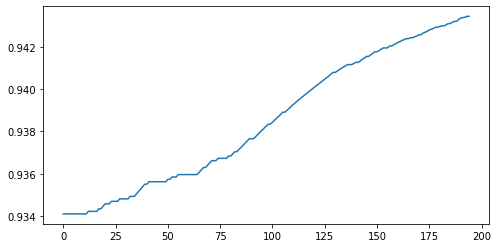

In [52]:
dropped_columns = []
rsq_adj = []
for i in range (195):
    xtrain = xtrain.drop(labels=col_to_drop,axis=1)
    xtest = xtest.drop(labels=col_to_drop,axis=1)
    ols = OLS(ytrain,add_constant(xtrain))
    model = ols.fit()
    col_to_drop = model.pvalues.sort_values().index[-1]
    dropped_columns.append(col_to_drop)
    rsq_adj.append(model.rsquared_adj)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(rsq_adj)

In [53]:
rsq_adj=model.rsquared_adj
rsq_adj

0.9434402011429939

In [54]:
#AG

In [55]:
dropped_columns

['MiscVal_800',
 'LowQualFinSF_53',
 'Alley_Pave',
 'LowQualFinSF_80',
 'HouseStyle_1Story',
 'Neighborhood_IDOTRR',
 'Electrical_FuseF',
 'Foundation_Stone',
 'RoofMatl_CompShg',
 'Exterior1st_MetalSd',
 'LowQualFinSF',
 '2ndFlrSF',
 'BldgType_Duplex',
 'KitchenAbvGr',
 'MSSubClass_90',
 'Heating_Floor',
 'Neighborhood_NoRidge',
 '3SsnPorch_23',
 'Foundation_Wood',
 'Foundation_PConc',
 'BsmtFinType2_Unf',
 'Exterior2nd_Stone',
 'Neighborhood_ClearCr',
 'BedroomAbvGr_1',
 'MoSold_8',
 'Condition1_RRNe',
 'Condition1_Feedr',
 'LandSlope_Sev',
 'Condition2_Norm',
 'Electrical_FuseP',
 'BldgType_TwnhsE',
 'RoofMatl_WdShake',
 'FullBath_3',
 'Exterior2nd_VinylSd',
 'Exterior2nd_MetalSd',
 'Exterior2nd_AsbShng',
 'Exterior2nd_BrkFace',
 'Exterior2nd_HdBoard',
 'Exterior2nd_Brk Cmn',
 'MSSubClass_120',
 'MSSubClass',
 'GarageCond_TA',
 'TotRmsAbvGrd_6',
 'BsmtHalfBath',
 'Heating_GasW',
 'MiscVal_480',
 'Condition2_RRNn',
 'GarageQual_TA',
 'GarageType_Detchd',
 'Neighborhood_Blueste',
 'Bs

In [56]:
xtrain.shape

(812, 173)

In [57]:
xtest.shape

(203, 173)

# Creating a Linear Regression model on the basis of selected columns

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [59]:
model.intercept_

array([-1.57199387e+16])

In [60]:
model.coef_

array([[-2.62851700e+03, -7.65494799e+16,  7.39791029e+03,
         3.81798412e+16,  8.49430940e+02, -4.96164174e+15,
         4.17062211e+03,  3.48622380e+03,  4.66179080e+03,
         2.53360000e+04,  9.84953805e+15,  5.01200000e+03,
        -1.27000000e+03,  1.18000000e+03,  3.74550000e+03,
         1.25650000e+03,  1.47800000e+03,  6.33850000e+03,
         5.85600000e+03,  1.54075000e+03, -2.02800000e+03,
         5.55200000e+03,  3.28700000e+03,  1.50140000e+04,
        -2.14845068e+15,  4.31225000e+03, -5.08925000e+03,
        -9.34282943e+15,  2.79600000e+03,  8.64125000e+03,
         7.44304255e+15,  8.31550000e+03, -5.12287500e+03,
         1.66524728e+14,  5.63675000e+03,  1.78720000e+04,
         3.55925238e+14,  4.61575014e+16, -3.15911555e+16,
         1.67374596e+15,  7.43250000e+03,  1.37733692e+15,
        -2.34425000e+03,  4.55038453e+14,  4.55038453e+14,
        -7.76362500e+03,  6.08112500e+03,  1.32798750e+04,
        -2.21605938e+04,  3.29325000e+03, -4.93962834e+1

# Find training | testing error --> Overfitting or not

In [61]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error,mean_absolute_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training MSE : {tr_mse:.4f}')
print(f'Testing MSE  : {ts_mse:.4f}')

Training MSE : 190752697.7475
Testing MSE  : 29276661792697018215076049218174976.0000


In [62]:
tr_mae = mean_absolute_error(ytrain,tr_pred)
ts_mae = mean_absolute_error(ytest,ts_pred)

print(f'Training MAE : {tr_mse**0.5:.4f}')
print(f'Testing MAE  : {ts_mse**0.5:.4f}')

Training MAE : 13811.3250
Testing MAE  : 171104242474279456.0000


# Regularisation

# Ridge or L2 Regularisation

In [63]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
model = rr.fit(xtrain,ytrain)

In [64]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error,mean_absolute_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print('Training MSE :',round(tr_mse,4))
print('Testing MSE :',round(ts_mse,4))

Training MSE : 190952385.6439
Testing MSE : 271470111.3593


In [65]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.5)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print('Training MSE :',round(tr_mse,4))
print('Testing  MSE :',round(ts_mse,4))

Training MSE : 193429750.3257
Testing  MSE : 258754289.2785


# Create a Tuning grid for calculating lambda with help of for loop

In [66]:
import numpy as np
lambdas = np.arange(0.1,23,0.1)
#lambdas

In [67]:
tr = []
ts = []
GE = []
for i in lambdas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    G_mse = ts_mse-tr_mse
    tr.append(tr_mse)
    ts.append(ts_mse)
    GE.append(G_mse)

In [68]:
#tr

In [69]:
#ts

# Visualize the tr and ts error (Ridge)

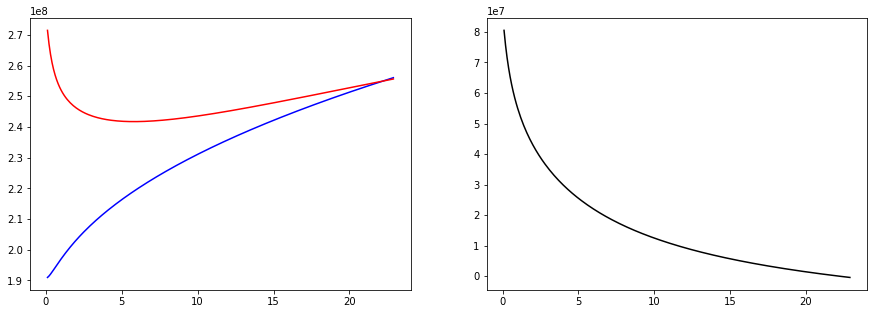

In [70]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

plt.subplot(1,2,2)
plt.plot(lambdas,GE,c='black')

In [71]:
#AG

In [72]:
tr = []
ts = []
for i in lambdas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)
    if tr_mse>ts_mse:
        print(f'Optimal value of Lambda is {i}')
        opt_lambda = i
        break

Optimal value of Lambda is 22.200000000000003


In [73]:
opt_lambda

22.200000000000003

# Final ridge model - Using the best value Alpha

In [74]:
# FINAL MODEL ~~~~>

rr = Ridge(alpha=opt_lambda)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)
print('Training MSE :',round(tr_mse,4))
print('Testing  MSE :',round(ts_mse,4))

Training MSE : 254933801.3085
Testing  MSE : 254930825.9691


In [75]:
tr_mae = mean_absolute_error(ytrain,tr_pred)
ts_mae = mean_absolute_error(ytest,ts_pred)
print('Training MAE :',round(tr_mae,4))
print('Testing  MAE :',round(ts_mae,4))

Training MAE : 11054.5075
Testing  MAE : 11184.4779


# Lasso (L1 Regularisation)

In [76]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)
print(f'Training MSE is : {tr_mse:.4f}')
print(f'Testing MSE is  : {ts_mse:.4f}')

Training MSE is : 190745054.5551
Testing MSE is  : 276644186.4542


# Using for loop for tuning lambda values

In [77]:
lambdas = np.arange(100,134,0.1)
#lambdas

In [78]:
tr = []
ts = []
GE = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    G_mse = ts_mse-tr_mse
    tr.append(tr_mse)
    ts.append(ts_mse)
    GE.append(G_mse)

In [79]:
#tr

In [80]:
#ts

# Visualize the tr and ts error (Lasso)

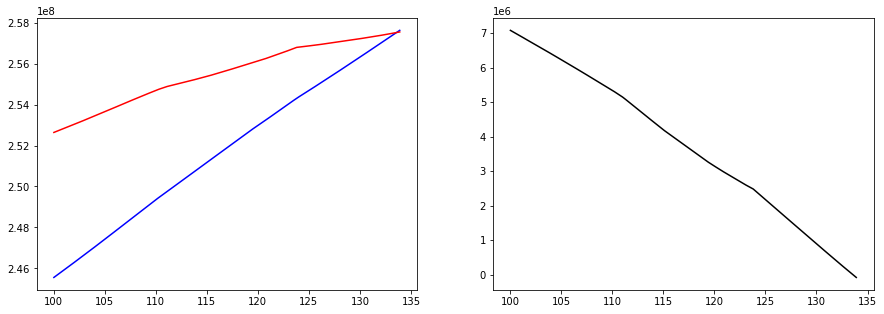

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

plt.subplot(1,2,2)
plt.plot(lambdas,GE,c='black')

In [82]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest, ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)
    if tr_mse > ts_mse:
        print(f'Optimal Value of lambda is {i}')
        opt_lambda = i
        break

Optimal Value of lambda is 133.5999999999981


In [83]:
opt_lambda

133.5999999999981

# Final optimal Lasso model - Using the best value of Alpha

In [84]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print('Training MSE :',round(tr_mse,4))
print('Testing  MSE :',round(ts_mse,4))

Training MSE : 257520131.1506
Testing  MSE : 257515714.4216


In [85]:
tr_mae = mean_absolute_error(ytrain,tr_pred)
ts_mae = mean_absolute_error(ytest,ts_pred)
print('Training MAE :',round(tr_mae,4))
print('Testing  MAE :',round(ts_mae,4))

Training MAE : 11170.7195
Testing  MAE : 11320.8587


# Create a Tuning grid for K-Fold Cross Validation on Ridge Model

In [86]:
alpha_grid = np.arange(0.1,12,0.1)
alpha_grid

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9])

In [87]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": alpha_grid}
rr = Ridge()
cv = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 11.6}

# Using the best value of Lambda, create a Ridge|Lasso Model by K-fold

In [88]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha= 11.6)
model = rr.fit(xtrain,ytrain)

In [89]:
xtrain.columns

Index(['1stFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFullBath', 'EnclosedPorch',
       'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_New', 'SaleType_WD', 'TotRmsAbvGrd_8',
       'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11',
       'Utilities_AllPub', 'YrSold_2007', 'YrSold_2010'],
      dtype='object', length=173)

# Creating test data ready for predictions

In [90]:
Q = test[["Id"]]
test = test.drop(labels=['Id'],axis=1) #Because All Unique

In [91]:
#Preprocessing of #test
#Cat & Con varibles seperation

con_cols = test[con]
cat_cols = test[cat]

#Standardization - of con columns
X_con = pd.DataFrame(ss.transform(con_cols),columns=con_cols.columns)

#OHE of categorical columns
X_cat = ohe.transform(cat_cols).toarray()
cols = ohe.get_feature_names_out()
X_cat = pd.DataFrame(X_cat,columns=cols)

#Combine con and cat varibles using join
Xtest_new = X_con.join(X_cat)

In [92]:
#ag

In [93]:
#Checking whether all columns are ther in testing "xtest_new" as well
#Xtest_new[list(xtrain.columns)].head(3)

In [94]:
#Doing this as some column is not present in "xtest_new"
lst = ['GarageCars_0', 'Exterior2nd_Other', 'BsmtFullBath_0', 'MiscVal_620', 'BsmtHalfBath_0', 'GarageCars_1', 'BsmtFullBath_1']
for i in lst:
    Xtest_new[i]=0

In [95]:
final_data_for_pred = Xtest_new[xtrain.columns]

# Using the best model to make final predictions on Testing.csv

### predict and save to file

In [96]:
pred = model.predict(final_data_for_pred)

In [97]:
pred

array([[124305.01972411],
       [168612.36011388],
       [194829.99634636],
       ...,
       [190881.52857943],
       [117368.51892379],
       [217088.31280267]])

In [98]:
Q['SalePrice']=pred

In [99]:
Q.to_csv("Desktop/Housing_submissions_AG.csv")

In [100]:
#Project_Done! :)